# Reading data 

In [121]:
import pandas as pd 
data = pd.read_csv('books.csv')
data

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,9925,86737,86737,3877968,52,1582349177,9.781582e+12,Mary Hoffman,2002.0,City of Masks,...,12048,13385,555,314,758,3154,4872,4287,https://images.gr-assets.com/books/1294870497m...,https://images.gr-assets.com/books/1294870497s...
1350,9937,13010211,13010211,18171867,22,1596435712,9.781596e+12,Caragh M. O'Brien,2012.0,Promised,...,11766,12884,1260,256,1098,3565,4392,3573,https://images.gr-assets.com/books/1330546217m...,https://images.gr-assets.com/books/1330546217s...
1351,9942,16074758,16074758,21869436,18,1442486597,9.781442e+12,"Abigail Haas, Abby McDonald",2013.0,Dangerous Girls,...,10439,12970,2631,203,553,2029,4567,5618,https://images.gr-assets.com/books/1356513050m...,https://images.gr-assets.com/books/1356513050s...
1352,9947,21393526,21393526,40690062,19,62320521,9.780062e+12,Maria Dahvana Headley,2015.0,Magonia,...,12510,13652,2910,577,1440,3881,4772,2982,https://images.gr-assets.com/books/1413479866m...,https://images.gr-assets.com/books/1413479866s...


# Data Cleaning 

#### Dealing with null values 

In [122]:
print(data.info())

data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354 entries, 0 to 1353
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    1354 non-null   int64  
 1   goodreads_book_id          1354 non-null   int64  
 2   best_book_id               1354 non-null   int64  
 3   work_id                    1354 non-null   int64  
 4   books_count                1354 non-null   int64  
 5   isbn                       1302 non-null   object 
 6   isbn13                     1310 non-null   float64
 7   authors                    1354 non-null   object 
 8   original_publication_year  1351 non-null   float64
 9   original_title             1302 non-null   object 
 10  title                      1354 non-null   object 
 11  language_code              1245 non-null   object 
 12  average_rating             1354 non-null   float64
 13  ratings_count              1354 non-null   int64

book_id                        0
goodreads_book_id              0
best_book_id                   0
work_id                        0
books_count                    0
isbn                          52
isbn13                        44
authors                        0
original_publication_year      3
original_title                52
title                          0
language_code                109
average_rating                 0
ratings_count                  0
work_ratings_count             0
work_text_reviews_count        0
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
image_url                      0
small_image_url                0
dtype: int64

In [123]:
''' this is a step to print all the rows having null values in each specific column to see what we can do with them and for what books does it belongs
    here I found out that all books with no isbn or isbn13 or original_publication_year or language code will not affect our analysis to Harry potter series 
    because no null value belong to any Harry potter book series also even if it were, we don't need this columns in our analysis
    so I decided to drop and remove them all '''
isbn_nullvalues = data[data['isbn'].isnull()]
print(isbn_nullvalues.to_string())
print()
isbn13_nullvalues = data[data['isbn'].isnull()]
print(isbn13_nullvalues.to_string())
print()
languagecode_nullvalues = data[data['language_code'].isnull()]
print(languagecode_nullvalues.to_string())

data = data.dropna(subset=['original_title','original_publication_year','language_code','isbn','isbn13'])



      book_id  goodreads_book_id  best_book_id   work_id  books_count isbn        isbn13                                   authors  original_publication_year                                  original_title                                                                      title language_code  average_rating  ratings_count  work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  ratings_3  ratings_4  ratings_5                                                                                 image_url                                                                         small_image_url
73        324           16068905      16068905  21861351           80  NaN           NaN                            Rainbow Rowell                     2013.0                                             NaN                                                                    Fangirl           eng            4.12         340379              371730                    39353       8626      16973    

#### Dealing with duplicates 

In [124]:
print(data.duplicated().sum())
# no duplicates found

0


# Data Analysis

#### Analysis on the Harry Potter book series

In [125]:
# here we only select from the whole data the rows which contain the word 'Harry Potter inside the 'original_title' column or if the 'authors' column contains any name of Harry Potter authors
HP_Data = data[ (data['original_title'].str.contains('Harry Potter'))| (data['authors'] == 'J.K. Rowling') | (data['authors'] =='J.K. Rowling, Mary GrandPré') | (data['authors'] =='J.K. Rowling, Mary GrandPré, Rufus Beck') ] 
# here we sort it according to 'original_publication_year' ascendingly
HP_Data = HP_Data.sort_values(by=['original_publication_year'], ascending=True)
HP_Data

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
9,23,15881,15881,6231171,398,439064864,9.780439e+12,"J.K. Rowling, Mary GrandPré",1998.0,Harry Potter and the Chamber of Secrets,...,1779331,1906199,34172,8253,42251,242345,548266,1065084,https://images.gr-assets.com/books/1474169725m...,https://images.gr-assets.com/books/1474169725s...
96,422,862041,862041,2962492,76,545044251,9.780545e+12,J.K. Rowling,1998.0,Complete Harry Potter Boxed Set,...,190050,204125,6508,1105,1285,7020,30666,164049,https://images.gr-assets.com/books/1392579059m...,https://images.gr-assets.com/books/1392579059s...
6,18,5,5,2402163,376,043965548X,9.780440e+12,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,...,1832823,1969375,36099,6716,20413,166129,509447,1266670,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...
10,24,6,6,3046572,332,439139600,9.780439e+12,"J.K. Rowling, Mary GrandPré",2000.0,Harry Potter and the Goblet of Fire,...,1753043,1868642,31084,6676,20210,151785,494926,1195045,https://images.gr-assets.com/books/1361482611m...,https://images.gr-assets.com/books/1361482611s...
1036,7018,483445,483445,471792,42,042519891X,9.780425e+12,David Colbert,2001.0,The Magical Worlds of Harry Potter: A Treasury...,...,13820,15145,267,329,1125,3766,3593,6332,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
8,21,2,2,2809203,307,439358078,9.780439e+12,"J.K. Rowling, Mary GrandPré",2003.0,Harry Potter and the Order of the Phoenix,...,1735368,1840548,28685,9528,31577,180210,494427,1124806,https://images.gr-assets.com/books/1387141547m...,https://images.gr-assets.com/books/1387141547s...
12,27,1,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
613,3753,10,10,21457570,6,439827604,9.780440e+12,J.K. Rowling,2005.0,"Harry Potter Collection (Harry Potter, #1-6)",...,24618,26274,882,203,186,946,3891,21048,https://images.gr-assets.com/books/1328867351m...,https://images.gr-assets.com/books/1328867351s...
11,25,136251,136251,2963218,263,545010225,9.780545e+12,"J.K. Rowling, Mary GrandPré",2007.0,Harry Potter and the Deathly Hallows,...,1746574,1847395,51942,9363,22245,113646,383914,1318227,https://images.gr-assets.com/books/1474171184m...,https://images.gr-assets.com/books/1474171184s...


#### Finding the most selling books within the Harry Potter series

In [126]:
''' To find the most selling books within the Harry Potter series We can know it from the 'ratings_count'column 
    which contains the total number of ratings to book which also mean total number of times the book sold '''
HP_Data = HP_Data.sort_values(by=['ratings_count'],ascending=False)
Most_selling_HPbooks = pd.concat([HP_Data['original_title'], HP_Data['ratings_count']], axis=1)
Most_selling_HPbooks.columns =['Series_Title' , 'Sold_Count']
Most_selling_HPbooks

,Series_Title,Sold_Count
1,Harry Potter and the Philosopher's Stone,4602479
6,Harry Potter and the Prisoner of Azkaban,1832823
9,Harry Potter and the Chamber of Secrets,1779331
10,Harry Potter and the Goblet of Fire,1753043
11,Harry Potter and the Deathly Hallows,1746574
8,Harry Potter and the Order of the Phoenix,1735368
12,Harry Potter and the Half-Blood Prince,1678823
92,The Tales of Beedle the Bard,284833
96,Complete Harry Potter Boxed Set,190050
613,"Harry Potter Collection (Harry Potter, #1-6)",24618


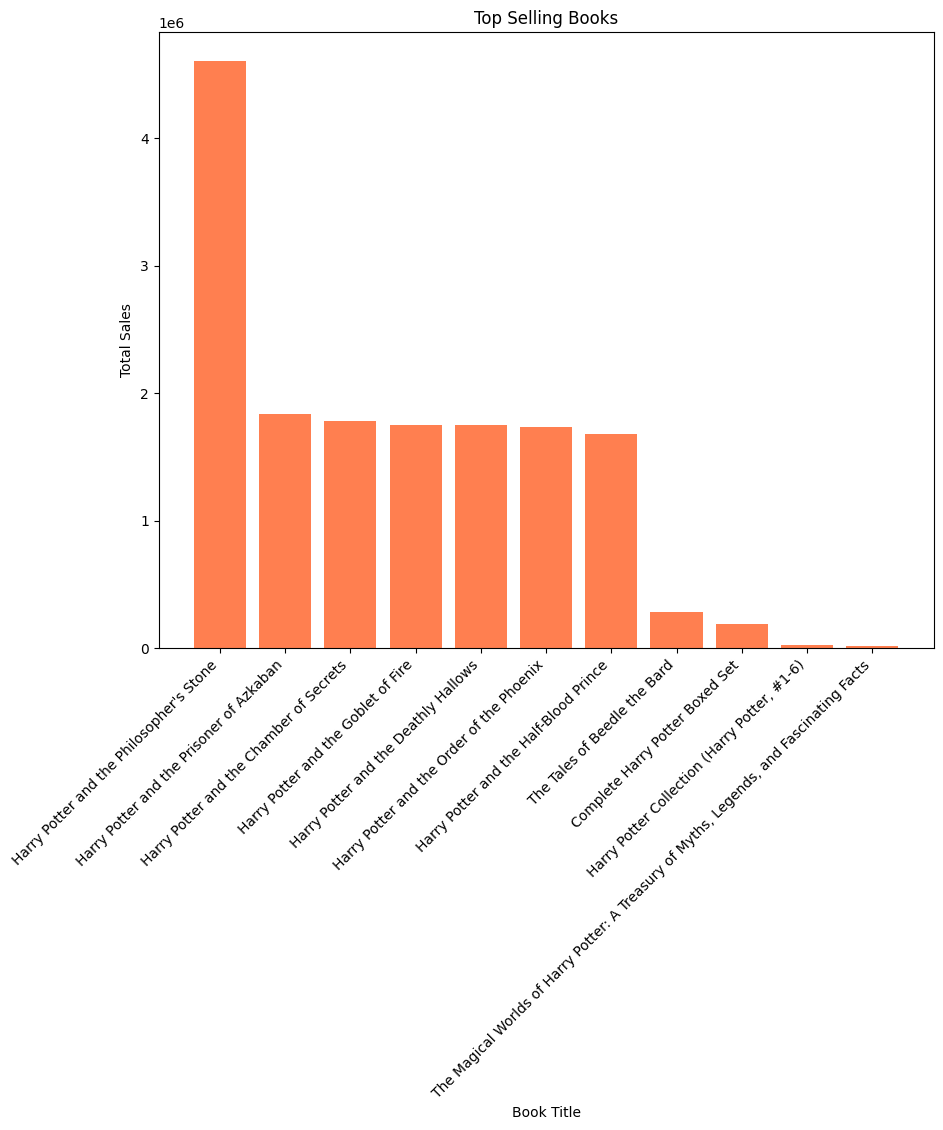

In [139]:
# Here I plotted the most selling books using a Bar chart 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.bar(Most_selling_HPbooks['Series_Title'], Most_selling_HPbooks['Sold_Count'], color='coral')
plt.xlabel('Book Title')
plt.ylabel('Total Sales')
plt.title('Top Selling Books')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#### Calculating the average rating of the Harry Potter books.


In [144]:
calculated_average_rating_ofHpbook = ( HP_Data['average_rating'] * HP_Data['ratings_count']) / (HP_Data['ratings_count']) 
calculated_average_rating_ofHpbook 
HP_Data['calculated_average_rating'] = calculated_average_rating_ofHpbook
Avr_rated_HPbooks = pd.concat([HP_Data['original_title'], HP_Data['calculated_average_rating']], axis=1)
Avr_rated_HPbooks.columns =['Book_Title' , 'Calculated Average ratings']
Avr_rated_HPbooks

,Book_Title,Calculated Average ratings
1,Harry Potter and the Philosopher's Stone,4.44
6,Harry Potter and the Prisoner of Azkaban,4.53
9,Harry Potter and the Chamber of Secrets,4.37
10,Harry Potter and the Goblet of Fire,4.53
11,Harry Potter and the Deathly Hallows,4.61
8,Harry Potter and the Order of the Phoenix,4.46
12,Harry Potter and the Half-Blood Prince,4.54
92,The Tales of Beedle the Bard,4.06
96,Complete Harry Potter Boxed Set,4.74
613,"Harry Potter Collection (Harry Potter, #1-6)",4.73


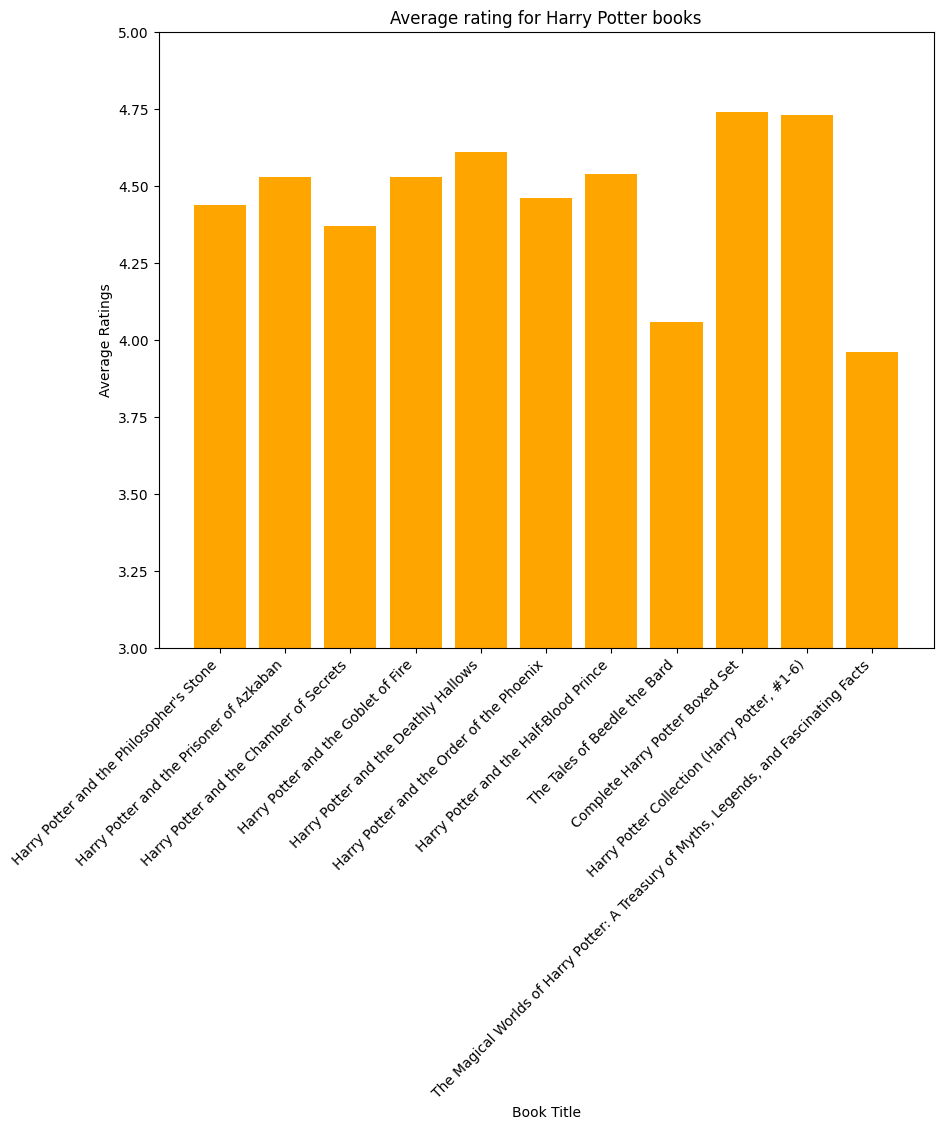

In [151]:
# Here I plotted the average rating using a Bar chart 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.bar(Avr_rated_HPbooks['Book_Title'], Avr_rated_HPbooks['Calculated Average ratings'], color='orange')
plt.xlabel('Book Title')
plt.ylabel('Average Ratings')
plt.title('Average rating for Harry Potter books')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim((3, 5))
plt.show()